<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module3/EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

Random Forest, Ada boost and Gradient boost are ensemble learning methods that combine multiple weak models (usually decision trees) to improve accuracy and reduce overfitting.

---

## 1. Random Forest
- Uses **bagging (Bootstrap Aggregating)** to train multiple decision trees independently.
- Each tree is trained on a random subset of data and features.
- The final prediction is:
  - **Classification:** Majority vote among trees.
  - **Regression:** Average of tree predictions.

---

## 2. AdaBoost
- **Sequentially trains weak classifiers**, adjusting sample weights to focus more on misclassified samples.
- Each weak learner’s contribution is weighted based on its accuracy.

### **Weight Update Formula:**
1. **Compute error of weak classifier \( h_t(x) \)**:
$$
\epsilon_t = \sum_{i=1}^{n} w_i I(y_i \neq h_t(x_i))
$$
2. **Compute model weight $(\alpha_t) $**:
$$
\alpha_t = \frac{1}{2} \log \left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$
3. **Update sample weights**:
$$
w_i^{t+1} = w_i^t \cdot e^{\alpha_t}, \quad \text{if misclassified}
$$
$$
w_i^{t+1} = w_i^t \cdot e^{-\alpha_t}, \quad \text{if correctly classified}
$$

**Final prediction:**
$$
H(x) = \text{sign} \left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
$$

---

## 3. Gradient Boosting
- Instead of adjusting sample weights, **Gradient Boosting minimizes residual errors**.
- Uses gradient descent to optimize predictions.

### **Step 1: Compute Residuals**
For regression, residuals are computed as:
$$
r_i = y_i - F(x_i)
$$
For classification, gradients of the loss function are used.

### **Step 2: Train a Weak Model on Residuals**
The new model learns to correct previous mistakes:
$$
h_t(x) = \arg \min_h \sum_{i=1}^{n} L(y_i, F_{t-1}(x_i) + h(x_i))
$$

### **Step 3: Update the Model**
$$
F_t(x) = F_{t-1}(x) + \eta h_t(x)
$$
where $\eta$ is the learning rate.

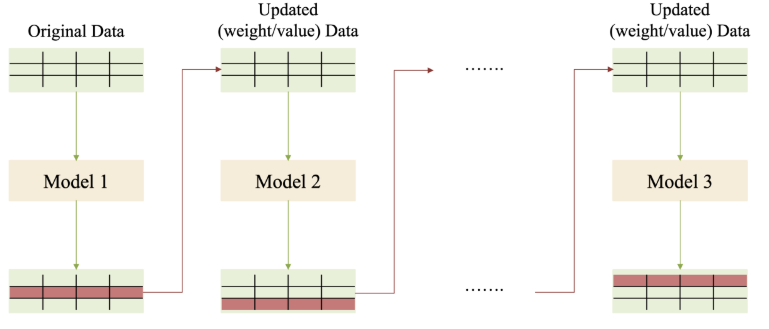


#Code

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error

##Process data

In [2]:
df = pd.read_csv('Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Ordinalize data

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns

print(categorical_columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [4]:
ordinal_encoder = OrdinalEncoder()
encoded_df = df.copy()
encoded_df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

encoded_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


Normalize the data

In [6]:
normalizer = StandardScaler()

dataset_arr = normalizer.fit_transform(encoded_df)

dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.80574124,
        -0.55403469,  1.22296203]])

Split the data 7:3

In [15]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    shuffle = is_shuffle)

In [16]:
regressor_rf = RandomForestRegressor(random_state= random_state)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [17]:
regressor_ada = AdaBoostRegressor(random_state= random_state)
regressor_ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [18]:
regressor_gb = GradientBoostingRegressor(random_state= random_state)
regressor_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [19]:
y_pred_rf = regressor_rf.predict(X_test)
y_pred_ada = regressor_ada.predict(X_test)
y_pred_gb = regressor_gb.predict(X_test)

In [22]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_ada = mean_squared_error(y_test, y_pred_ada)
mse_gb = mean_squared_error(y_test, y_pred_gb)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"MSE Random Forest: {mse_rf}")
print(f"MSE AdaBoost: {mse_ada}")
print(f"MSE Gradient Boosting: {mse_gb}")
print(f"MAE Random Forest: {mae_rf}")
print(f"MAE AdaBoost: {mae_ada}")
print(f"MAE Gradient Boosting: {mae_gb}")


MSE Random Forest: 0.38195138116460775
MSE AdaBoost: 0.5527736184547828
MSE Gradient Boosting: 0.39588441844417654
MAE Random Forest: 0.4617051961099172
MAE AdaBoost: 0.5537849296165611
MAE Gradient Boosting: 0.452154627097179
